### Importing needed packages

In [41]:
from sklearn.cluster import DBSCAN
from sklearn import preprocessing
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

### Data generation using make_blobs

In [42]:
def creat_data_point(centroidLocation, numSamples, clusterDeviation):
    """
    The function below will generate the data points and requires these inputs
    """
    x, y = make_blobs(
        n_samples=numSamples, centers=centroidLocation, cluster_std=clusterDeviation
    )
    scaler = preprocessing.StandardScaler()
    x = scaler.fit_transform(x)
    return x, y

In [43]:
x, y = creat_data_point([[4, 3], [2, -1], [-1, 4]], 1500, 0.5)
print(x[:5])
print(y[:5])

[[-1.37576665  0.99035105]
 [ 0.18631591 -1.21725943]
 [ 0.90624233  0.65444775]
 [-1.327494    0.82373772]
 [-1.37679741  1.05487386]]
[2 1 0 2 2]


### DBSCAN MODEL

In [44]:
epsilon = 0.3
minimumSamples = 7

cluster = DBSCAN(eps=epsilon, min_samples=minimumSamples)
cluster.fit(x)

DBSCAN(eps=0.3, min_samples=7)

In [45]:
labels = cluster.labels_
labels

array([0, 1, 2, ..., 1, 0, 2], shape=(1500,))

In [46]:
# Number of clusters in labels, ignoring noise if present.
n_cluster = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Estimated Number of Clusters:\n{n_cluster}")
print(f"Estimated number of noises:\n{n_noise}")

Estimated Number of Clusters:
3
Estimated number of noises:
2


In [47]:
unique_labels = set(labels)
print(unique_labels)

core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[cluster.core_sample_indices_] = True

{np.int64(0), np.int64(1), np.int64(2), np.int64(-1)}


### Data visualization

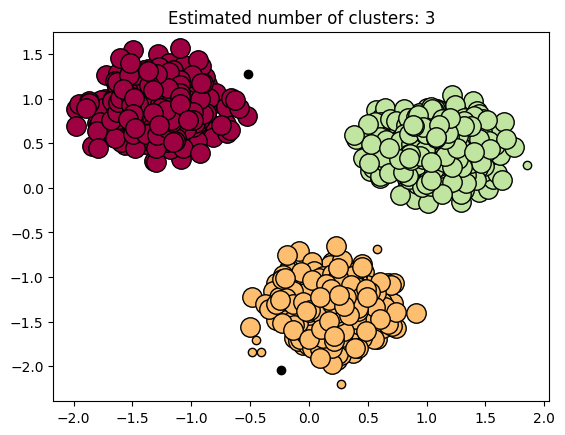

In [48]:
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = x[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = x[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_cluster}")
plt.show()